In [1]:
import json

import matplotlib.pyplot as plt

In [2]:
BASELINE_JSON = "../data/baseline_overview.json"

In [3]:
baseline_metrics = json.load(open(BASELINE_JSON, "r"))
scenes = sorted(baseline_metrics.keys())
print(f"Loaded metrics for {len(scenes)} scenes")

Loaded metrics for 38 scenes


In [4]:
metrics = [
    "n_images",
    "n_reg_images",
    "perc_reg_images",
    "mean_reprojection_error",
    "mean_obs_per_reg_image",
    "n_observations",
    "mean_track_length",
    "mean_overlap",
]

In [5]:
for scene in scenes:
    print(f"Scene: {scene}")
    print(f"\tN images:            {baseline_metrics[scene][0]['n_images']}")
    print(f"\tN registered images: {baseline_metrics[scene][0]['n_reg_images']}")
    print(f"\t% registered images: {baseline_metrics[scene][0]['perc_reg_images']}")
    

Scene: 0015
	N images:            3836
	N registered images: 2429
	% registered images: 63.32116788321168
Scene: 0016
	N images:            2724
	N registered images: 2053
	% registered images: 75.36710719530103
Scene: 0022
	N images:            2730
	N registered images: 1930
	% registered images: 70.6959706959707
Scene: 0047
	N images:            1183
	N registered images: 306
	% registered images: 25.86644125105664
Scene: 0058
	N images:            1761
	N registered images: 408
	% registered images: 23.168654173764907
Scene: 0064
	N images:            7191
	N registered images: 1074
	% registered images: 14.935335836462244
Scene: 0121
	N images:            7573
	N registered images: 1214
	% registered images: 16.030635151195035
Scene: 0129
	N images:            5898
	N registered images: 799
	% registered images: 13.546965072906069
Scene: 0133
	N images:            5896
	N registered images: 609
	% registered images: 10.329036635006785
Scene: 0168
	N images:            2921
	N regi

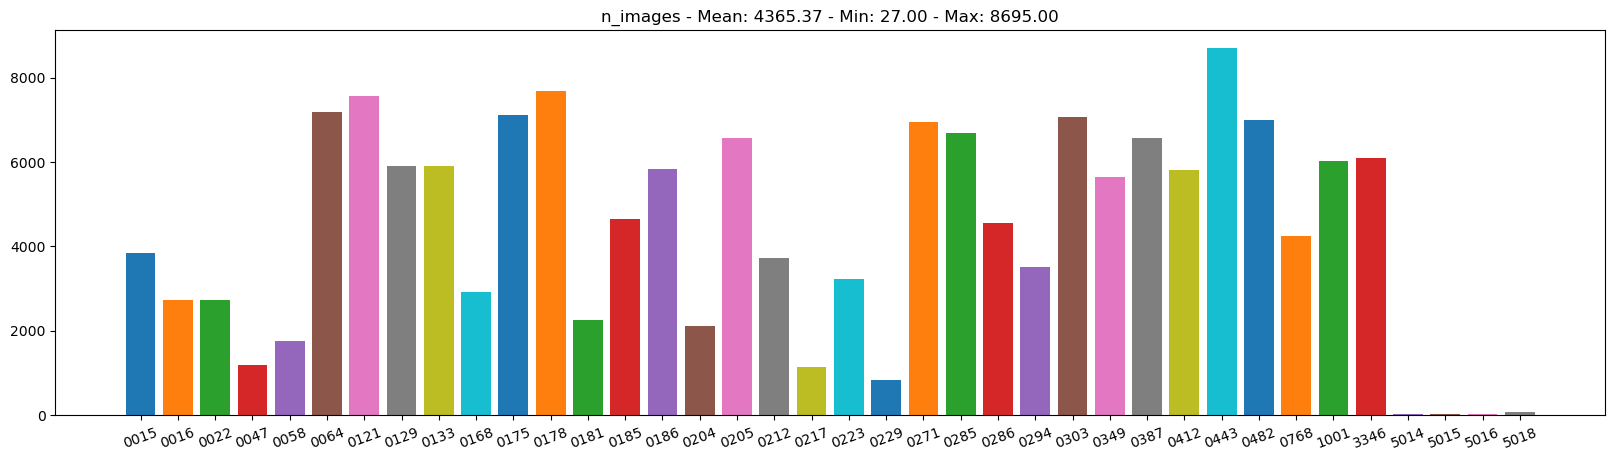

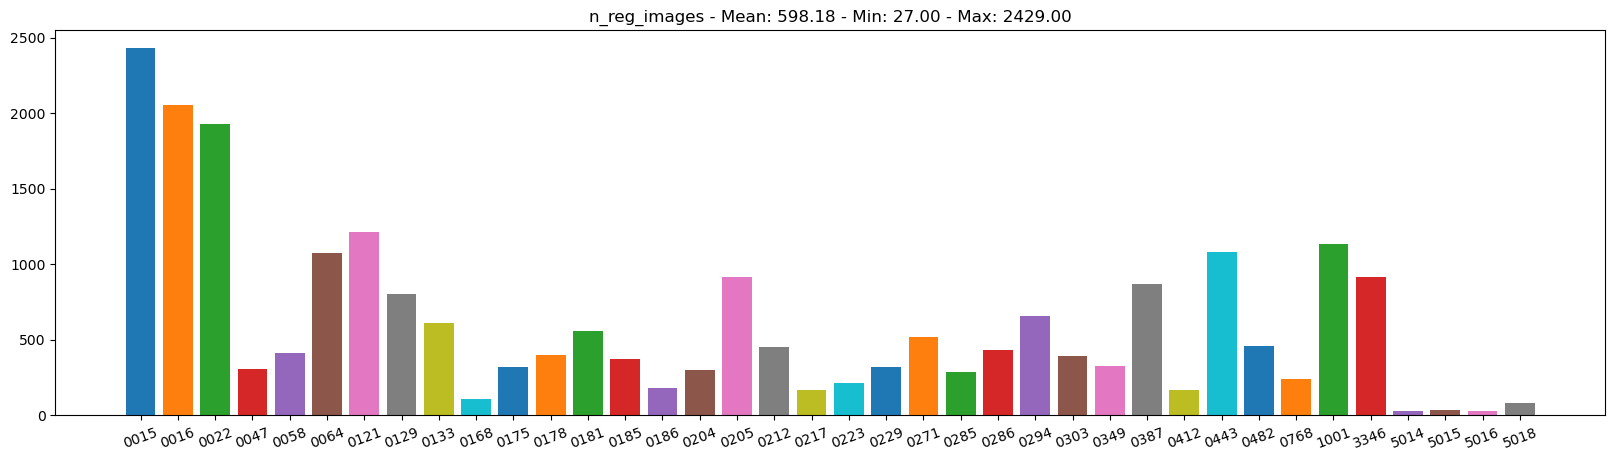

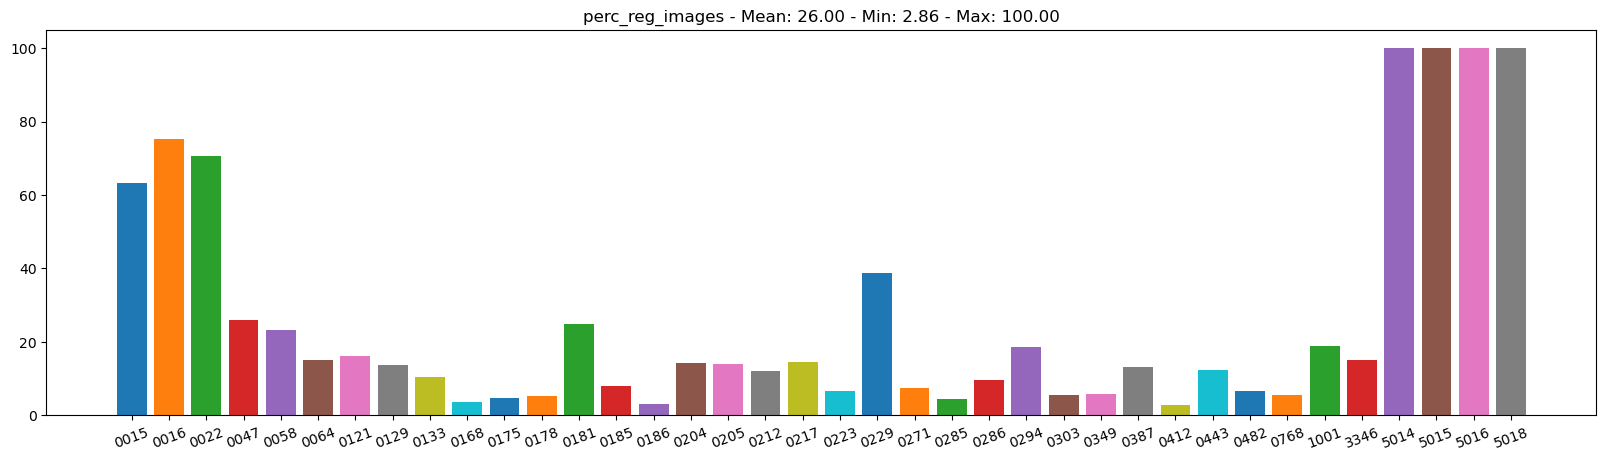

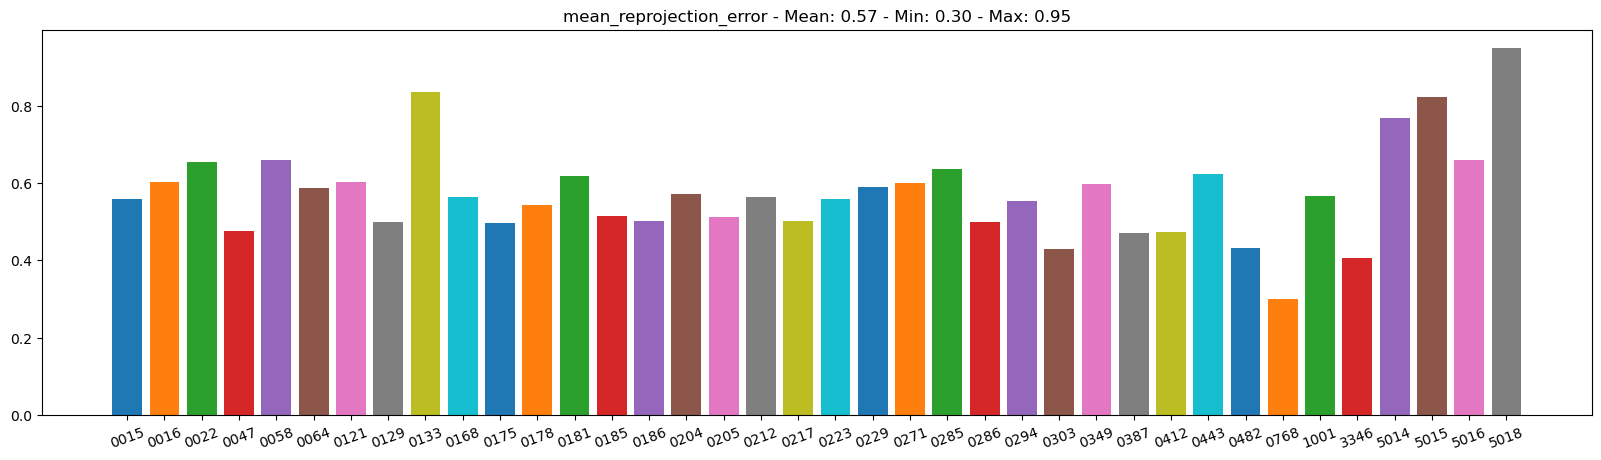

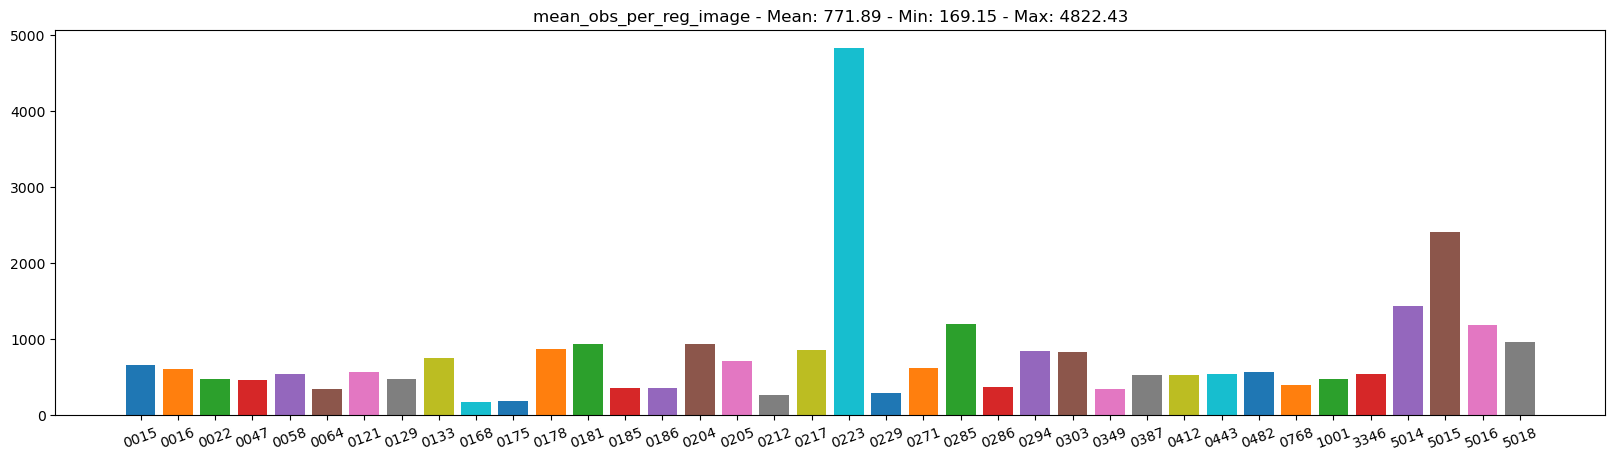

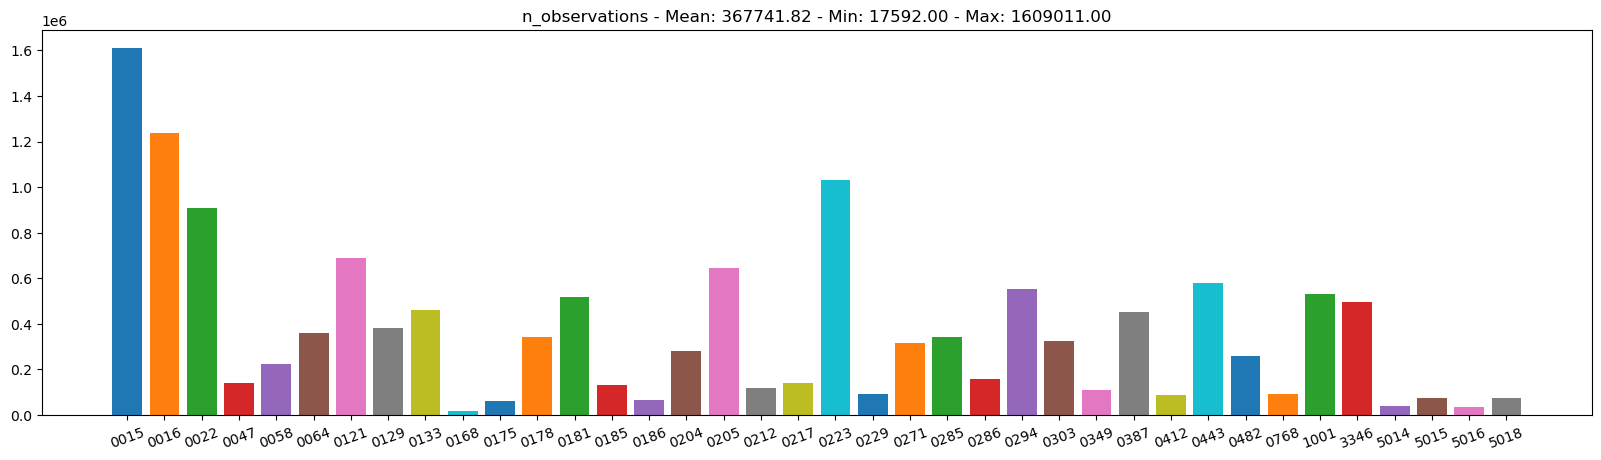

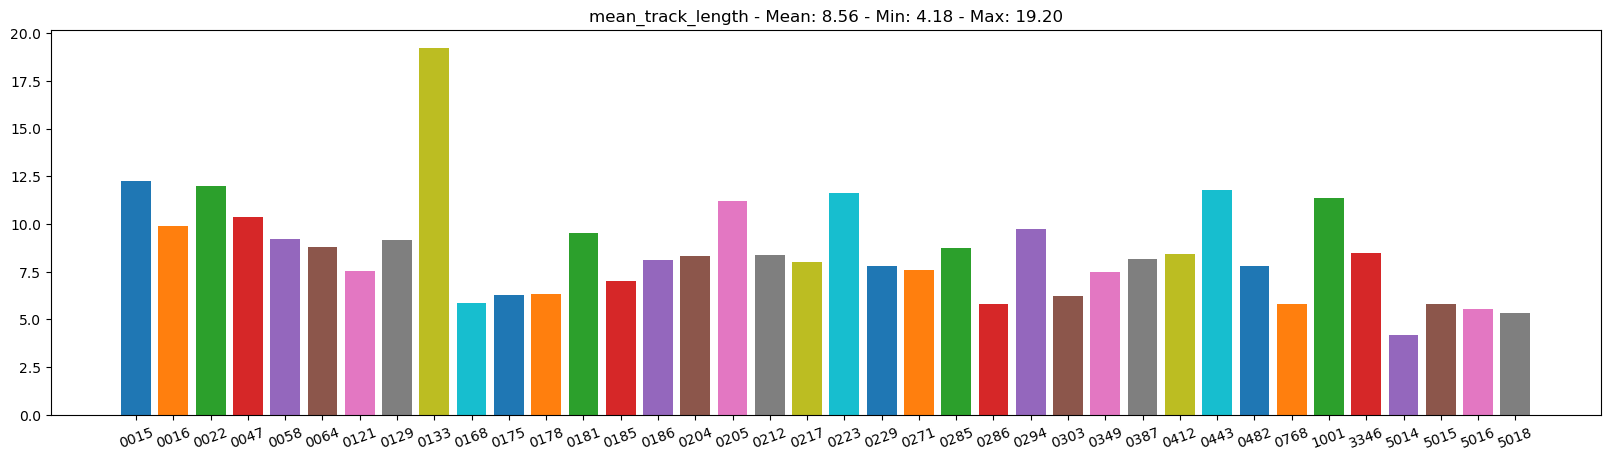

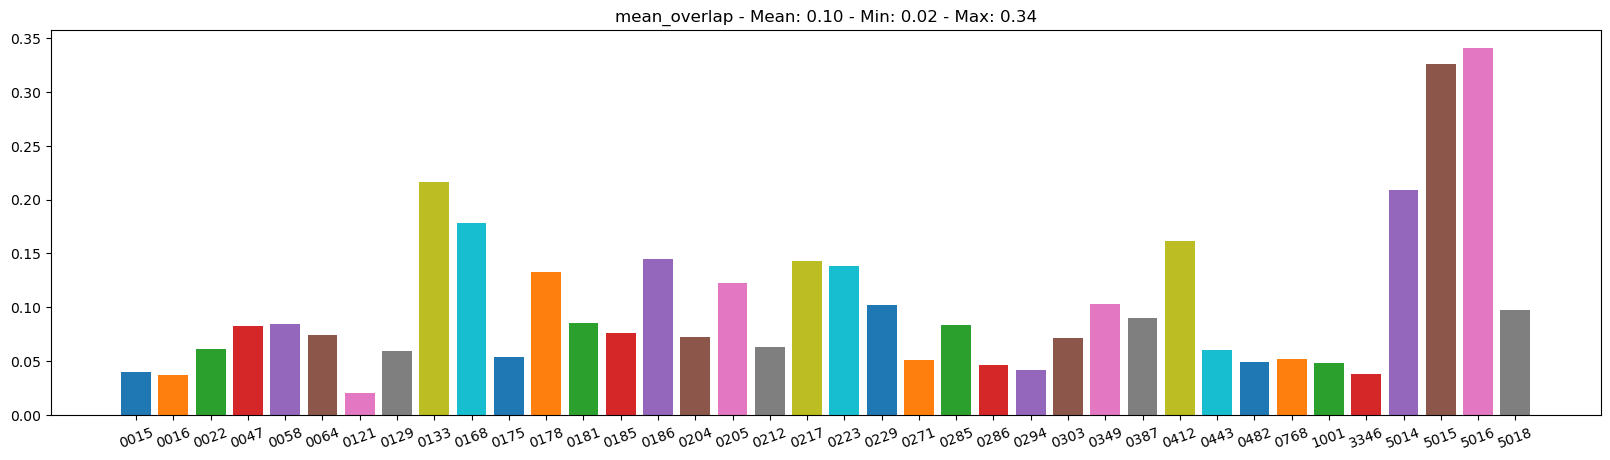

In [6]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for metric in metrics:
    data = [baseline_metrics[scene][0][metric] for scene in scenes]

    plt.figure(figsize=(20, 5))
    plt.title(f"{metric} - Mean: {sum(data) / len(data):.2f} - Min: {min(data):.2f} - Max: {max(data):.2f}")
    plt.bar(scenes, data, color=colors)
    plt.xticks(rotation=20)
    plt.savefig(f"../plots/baseline_overview/{metric}.png")
    plt.show()


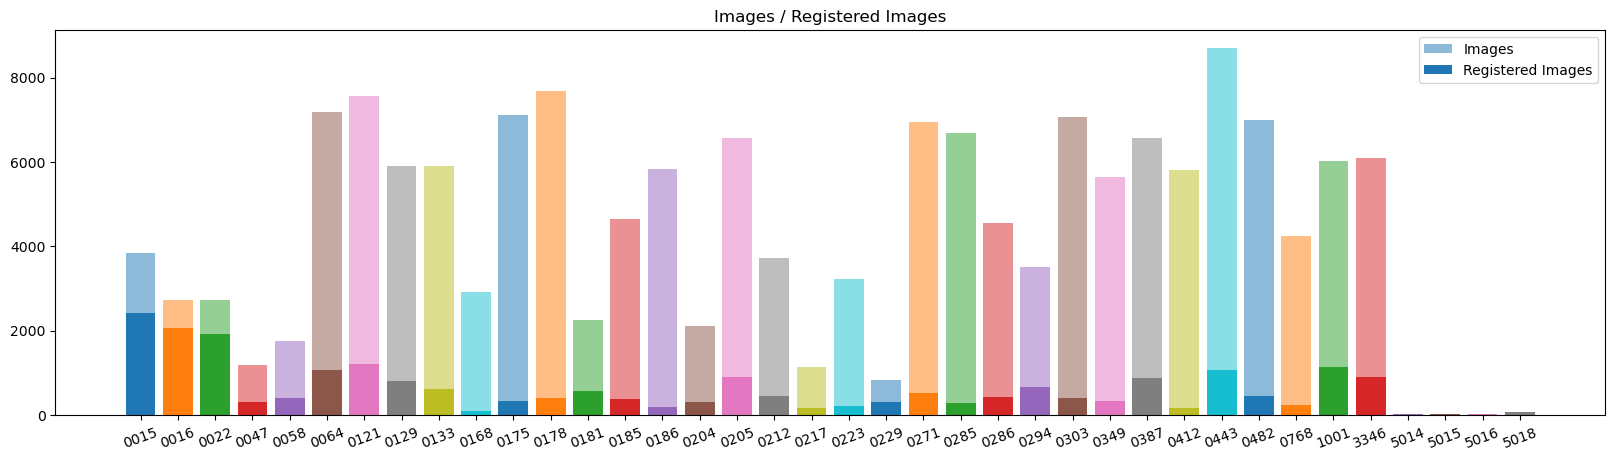

In [7]:
n_images = [baseline_metrics[scene][0]["n_images"] for scene in scenes]
n_reg_images = [baseline_metrics[scene][0]["n_reg_images"] for scene in scenes]

plt.figure(figsize=(20, 5))
plt.title("Images / Registered Images")
plt.bar(scenes, n_images, color=colors, alpha=0.5, label="Images")
plt.bar(scenes, n_reg_images, color=colors, label="Registered Images")
plt.xticks(rotation=20)
plt.legend()

plt.savefig("../plots/baseline_overview/images-vs-reg-images.png")
plt.show()

In [8]:
path = "../data/md_image_counts.txt"
with open(path, "r") as f:
    md_img_counts = f.readlines()

md_img_counts = [line.strip() for line in md_img_counts]
md_img_counts = [int(line) for line in md_img_counts]
len(md_img_counts)

38

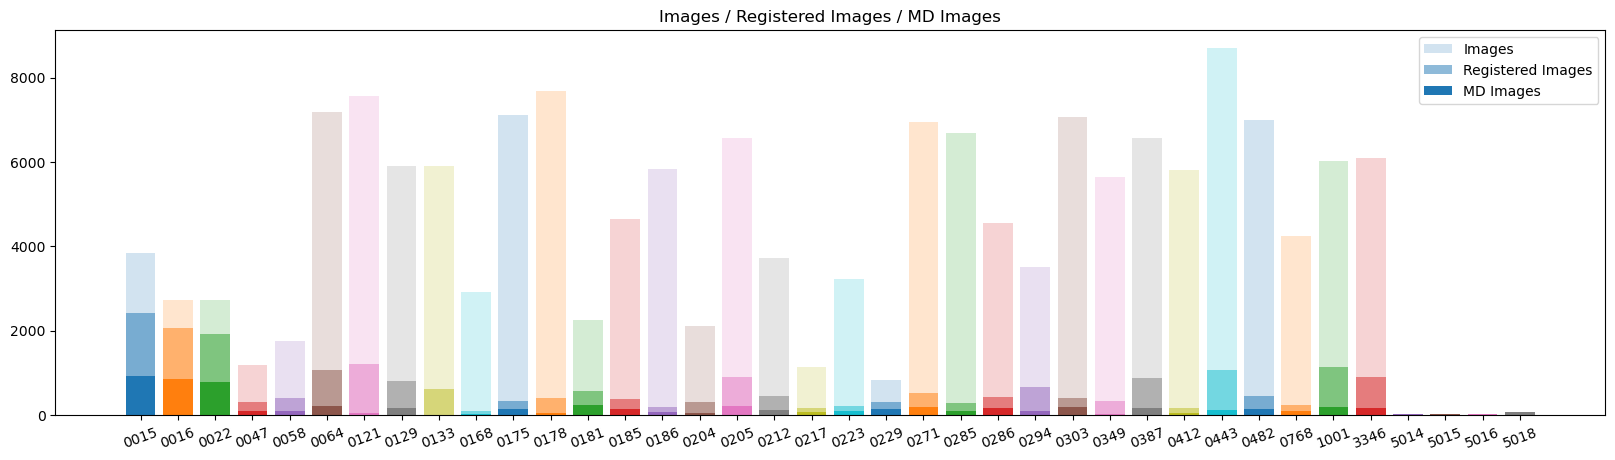

In [9]:
plt.figure(figsize=(20, 5))
plt.title("Images / Registered Images / MD Images")
plt.bar(scenes, n_images, color=colors, alpha=0.2, label="Images")
plt.bar(scenes, n_reg_images, color=colors, alpha=0.5, label="Registered Images")
plt.bar(scenes, md_img_counts, color=colors, label="MD Images")
plt.xticks(rotation=20)
plt.legend()

plt.savefig("../plots/baseline_overview/images-vs-md_images.png")
plt.show()

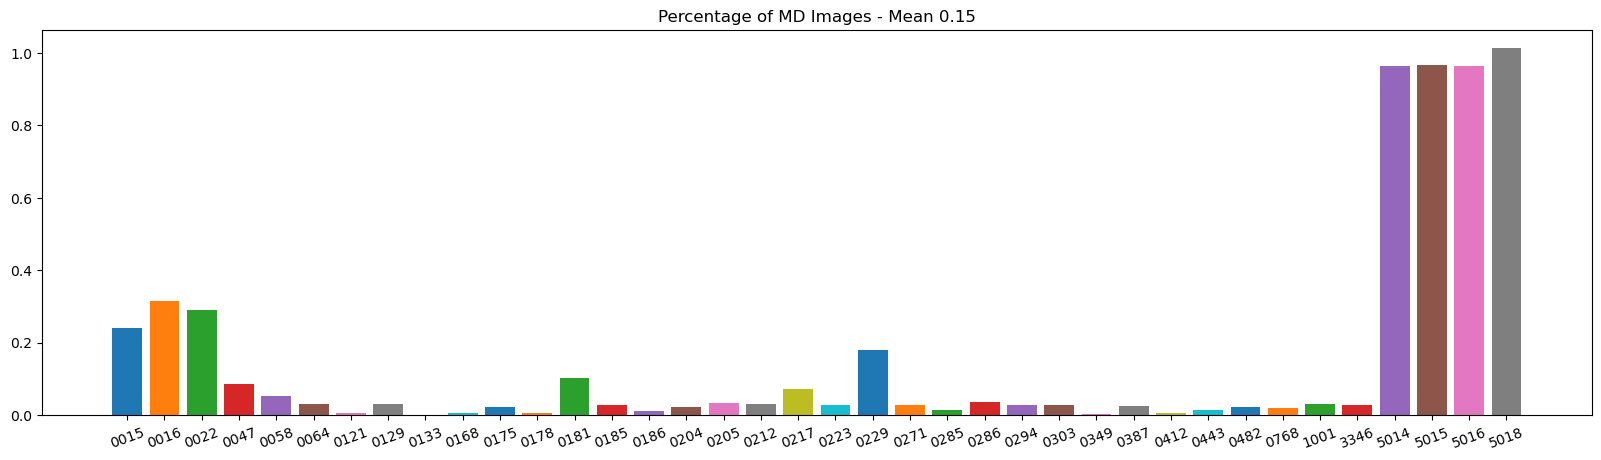

In [10]:
perc_md_images = [n / n_images[i] for i, n in enumerate(md_img_counts)]

plt.figure(figsize=(20, 5))
plt.title(f"Percentage of MD Images - Mean {sum(perc_md_images) / len(perc_md_images):.2f}")
plt.bar(scenes, perc_md_images, color=colors)
plt.xticks(rotation=20)

plt.savefig("../plots/baseline_overview/percentage-md-images.png")
plt.show()

In [11]:
mean = sum(perc_md_images[:-4]) / (len(perc_md_images[:-4]))

print(f"Mean without last scenes: {mean:.2f} %")

Mean without last scenes: 0.05 %


In [12]:
# correct mean of md images
total_md = sum(md_img_counts)

total_images = sum(n_images)

print(f"Total MD Images: {total_md}")
print(f"Total Images: {total_images}")

print(f"Corrected Mean: {total_md / total_images * 100:.2f} %")

Total MD Images: 6376
Total Images: 165884
Corrected Mean: 3.84 %


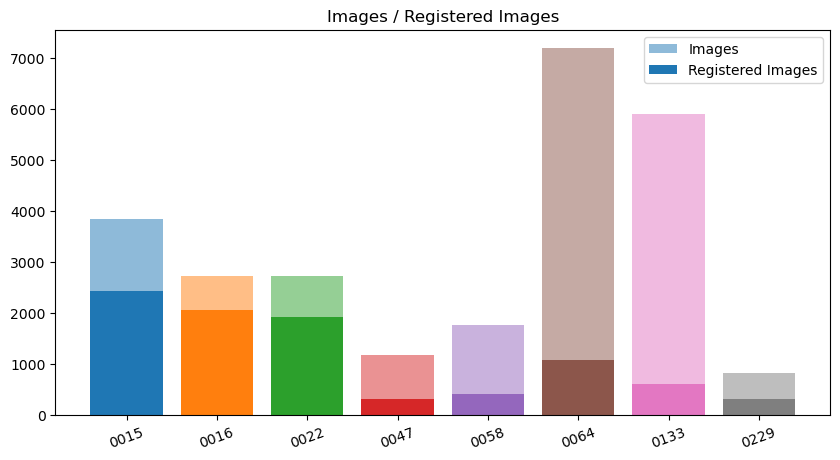

Mean registered images:          40.3 %
Weighted mean registered images: 34.9 %


In [17]:
data = {
    "0015": {
        "n_images": 3836,
        "base_reg_images": 2429,
        "super_reg_images": 3279,
    },
    "0016": {
        "n_images": 2724,
        "base_reg_images": 2053,
        "super_reg_images": 2604,
    },
    "0022": {
        "n_images": 2730,
        "base_reg_images": 1930,
        "super_reg_images": 2620,
    },
    "0047": {
        "n_images": 1183,
        "base_reg_images": 306,
        "super_reg_images": 1134,
    },
    "0058": {
        "n_images": 1761,
        "base_reg_images": 408,
        "super_reg_images": 1722,
    },
    "0064": {
        "n_images": 7191,
        "base_reg_images": 1074,
        "super_reg_images": 4445,
    },
    "0133": {
        "n_images": 5898,
        "base_reg_images": 609,
        "super_reg_images": 1749,
    },
    # "0217": {
    #     "n_images": 1129,
    #     "base_reg_images": 164,
    #     "super_reg_images": 0,
    # },
    "0229": {
        "n_images": 821,
        "base_reg_images": 318,
        "super_reg_images": 617,
    },
}

plt.figure(figsize=(10, 5))
plt.title("Images / Registered Images")
plt.bar(data.keys(), [d["n_images"] for d in data.values()], color=colors, alpha=0.5, label="Images")
plt.bar(data.keys(), [d["base_reg_images"] for d in data.values()], color=colors, label="Registered Images")
plt.xticks(rotation=20)
plt.legend()

plt.savefig("../plots/baseline_overview/baseline-registered.png")
plt.show()

mean_reg = sum(d["base_reg_images"] / d["n_images"] for d in data.values()) / len(data)
print(f"Mean registered images:          {mean_reg*100:.1f} %")

w_mean_reg = sum(d["base_reg_images"] for d in data.values()) / sum(d["n_images"] for d in data.values())
print(f"Weighted mean registered images: {w_mean_reg*100:.1f} %")


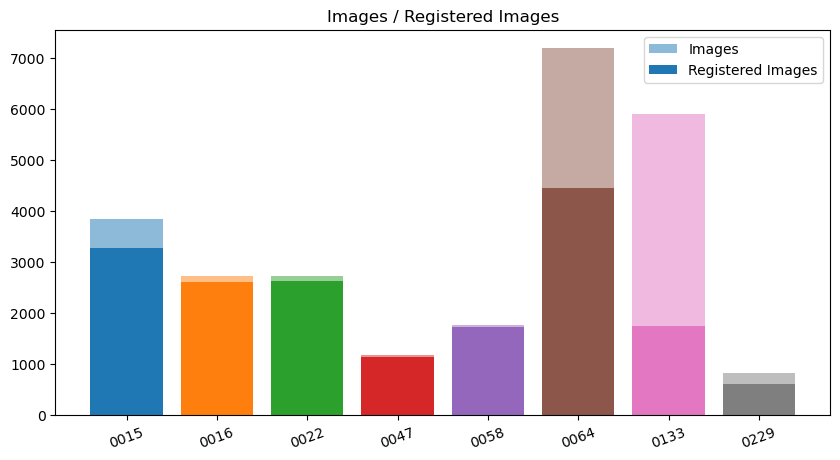

Mean registered images:          79.7 %
Weighted mean registered images: 69.5 %


In [18]:
plt.figure(figsize=(10, 5))
plt.title("Images / Registered Images")
plt.bar(data.keys(), [d["n_images"] for d in data.values()], color=colors, alpha=0.5, label="Images")
plt.bar(data.keys(), [d["super_reg_images"] for d in data.values()], color=colors, label="Registered Images")
plt.xticks(rotation=20)
plt.legend()

plt.savefig("../plots/baseline_overview/super-registered.png")
plt.show()

mean_reg = sum(d["super_reg_images"] / d["n_images"] for d in data.values()) / len(data)
print(f"Mean registered images:          {mean_reg*100:.1f} %")

w_mean_reg = sum(d["super_reg_images"] for d in data.values()) / sum(d["n_images"] for d in data.values())
print(f"Weighted mean registered images: {w_mean_reg*100:.1f} %")